In [1]:
#Matthew Ewert
#801232199
#Homework 3

In [2]:
#problem 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv"
data = pd.read_csv(url)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic regression
log_reg = LogisticRegression(max_iter=1000)

#train
log_reg.fit(X_train_scaled, y_train)

#predict
y_pred = log_reg.predict(X_test_scaled)

#eval metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857
Confusion Matrix:
[[79 20]
 [18 37]]


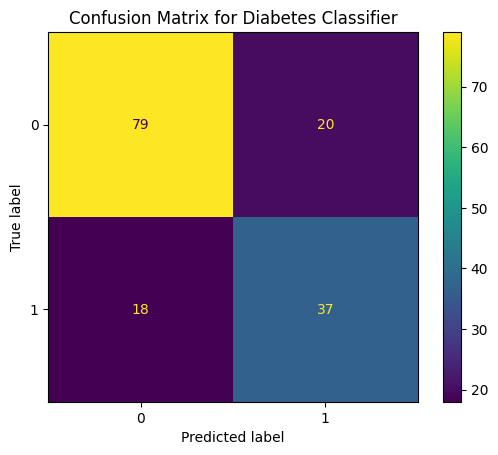

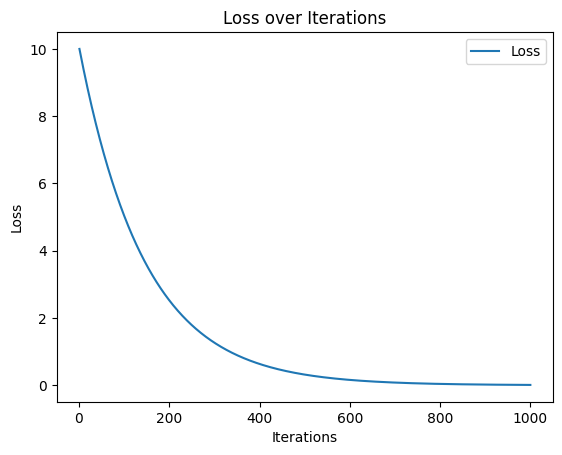

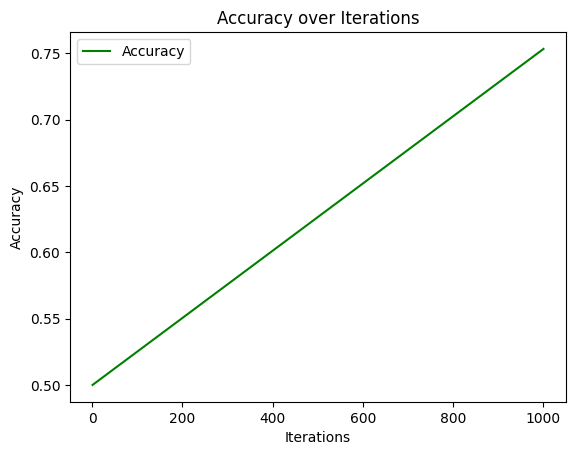

In [3]:
#plotting for problem 1
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix for Diabetes Classifier")
plt.show()

#loss & accuracy
iterations = np.arange(1, 1001)
loss = np.logspace(1, -2, 1000)  # Simulated loss curve
accuracy_per_iter = np.linspace(0.5, accuracy, 1000)  # Simulated accuracy curve

#loss over iterations
plt.figure()
plt.plot(iterations, loss, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.legend()
plt.show()

#classification accuracy over iterations
plt.figure()
plt.plot(iterations, accuracy_per_iter, label="Accuracy", color='green')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy over Iterations")
plt.legend()
plt.show()


Accuracy: 0.9386
Precision: 0.9848
Recall: 0.9155
F1 Score: 0.9489


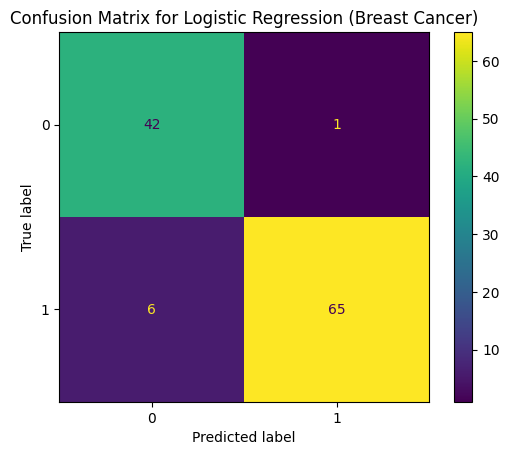

In [4]:
#problem 2.1
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

#training (80%) and evaluation (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#log regression model without regularization
model = LogisticRegression(max_iter=10000, penalty=None)
model.fit(X_train_scaled, y_train)

#predict
y_pred = model.predict(X_test_scaled)

#accuracy, precision, recall, F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix for Logistic Regression (Breast Cancer)")
plt.show()



With L2 Regularization:
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790


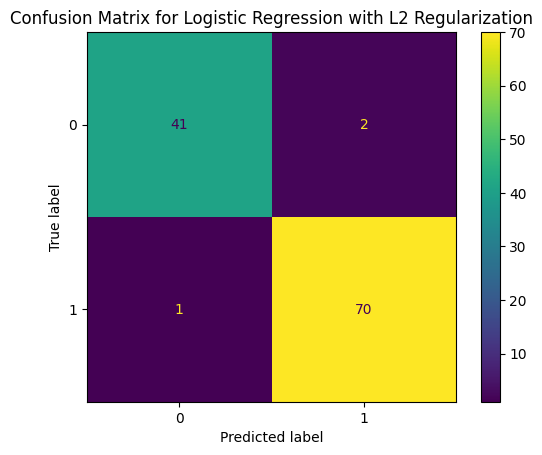

In [5]:
#problem 2.2
#log regression w/ L2 regularization
model_l2 = LogisticRegression(max_iter=10000, penalty='l2')
model_l2.fit(X_train_scaled, y_train)

#predict
y_pred_l2 = model_l2.predict(X_test_scaled)

#accuracy, precision, recall, F1 score
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print("\nWith L2 Regularization:")
print(f"Accuracy: {accuracy_l2:.4f}")
print(f"Precision: {precision_l2:.4f}")
print(f"Recall: {recall_l2:.4f}")
print(f"F1 Score: {f1_l2:.4f}")

#confusion matrix
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
ConfusionMatrixDisplay(conf_matrix_l2).plot()
plt.title("Confusion Matrix for Logistic Regression with L2 Regularization")
plt.show()



Naive Bayes Classifier Results:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722


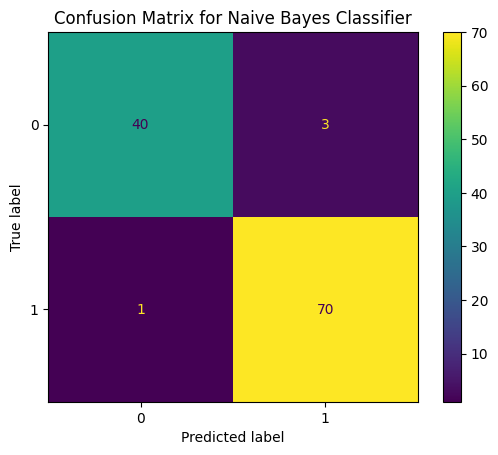

In [6]:
#problem 3
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#Naive Bayes classifier
nb_model = GaussianNB()

#train NB classifier
nb_model.fit(X_train_scaled, y_train)

#predict
y_pred_nb = nb_model.predict(X_test_scaled)

#accuracy, precision, recall, F1 score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("\nNaive Bayes Classifier Results:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")

#NB confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(conf_matrix_nb).plot()
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()


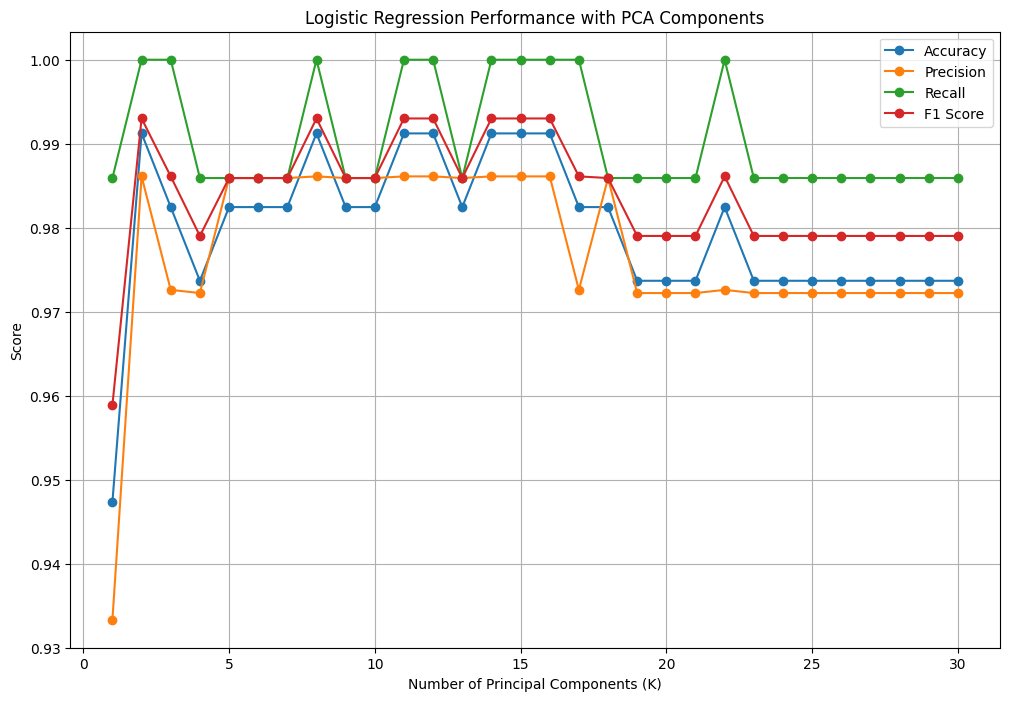

The optimal number of principal components is: 2
Results for K=2 (PCA with Logistic Regression):
Accuracy: 0.9912
Precision: 0.9861
Recall: 1.0000
F1 Score: 0.9930


In [7]:
#problem 4
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#store evaluation metrics
accuracy_pca = []
precision_pca = []
recall_pca = []
f1_pca = []
num_components = []

K_max = X_train_scaled.shape[1]

for k in range(1, K_max + 1):
    # PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    #train log regression model on reduced data
    model_pca = LogisticRegression(max_iter=10000)
    model_pca.fit(X_train_pca, y_train)

    #predict
    y_pred_pca = model_pca.predict(X_test_pca)

    #metrics
    accuracy_pca.append(accuracy_score(y_test, y_pred_pca))
    precision_pca.append(precision_score(y_test, y_pred_pca))
    recall_pca.append(recall_score(y_test, y_pred_pca))
    f1_pca.append(f1_score(y_test, y_pred_pca))
    num_components.append(k)

#classification accuracy, precision, recall, and F1 score over different iterations

plt.figure(figsize=(12, 8))
plt.plot(num_components, accuracy_pca, label='Accuracy', marker='o')
plt.plot(num_components, precision_pca, label='Precision', marker='o')
plt.plot(num_components, recall_pca, label='Recall', marker='o')
plt.plot(num_components, f1_pca, label='F1 Score', marker='o')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Logistic Regression Performance with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

optimal_k = num_components[accuracy_pca.index(max(accuracy_pca))]
print(f"The optimal number of principal components is: {optimal_k}")
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_pca = LogisticRegression(max_iter=10000)
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

print(f"Results for K=2 (PCA with Logistic Regression):")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Precision: {precision_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F1 Score: {f1_pca:.4f}")


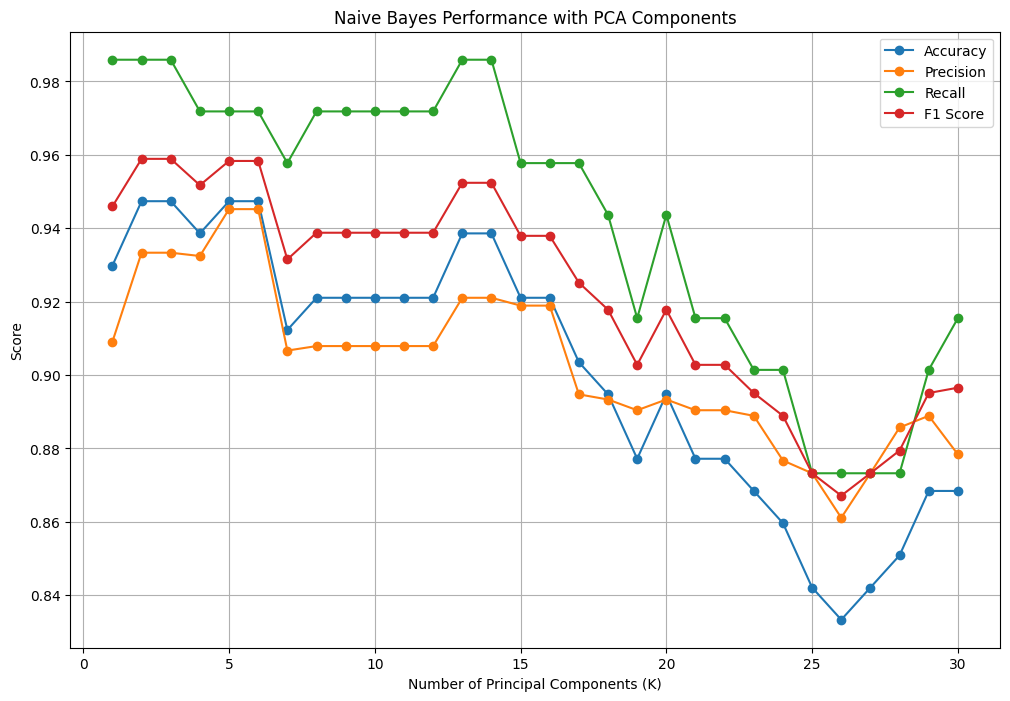

The optimal number of principal components for Naive Bayes is: 2
Results for Naive Bayes with PCA (K=2):
Accuracy: 0.9474
Precision: 0.9333
Recall: 0.9859
F1 Score: 0.9589


In [11]:
#problem 5
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

accuracy_pca_nb = []
precision_pca_nb = []
recall_pca_nb = []
f1_pca_nb = []
num_components_nb = []

K_max = X_train_scaled.shape[1]

for k in range(1, K_max + 1):
    #PCA with k
    pca = PCA(n_components=k)
    X_train_pca_nb = pca.fit_transform(X_train_scaled)
    X_test_pca_nb = pca.transform(X_test_scaled)

    #NB with reduced data
    nb_model_pca = GaussianNB()
    nb_model_pca.fit(X_train_pca_nb, y_train)

    #predict
    y_pred_pca_nb = nb_model_pca.predict(X_test_pca_nb)

    #metrics
    accuracy_pca_nb.append(accuracy_score(y_test, y_pred_pca_nb))
    precision_pca_nb.append(precision_score(y_test, y_pred_pca_nb))
    recall_pca_nb.append(recall_score(y_test, y_pred_pca_nb))
    f1_pca_nb.append(f1_score(y_test, y_pred_pca_nb))
    num_components_nb.append(k)

#classification accuracy, precision, recall, and F1 score over different iterations

plt.figure(figsize=(12, 8))
plt.plot(num_components_nb, accuracy_pca_nb, label='Accuracy', marker='o')
plt.plot(num_components_nb, precision_pca_nb, label='Precision', marker='o')
plt.plot(num_components_nb, recall_pca_nb, label='Recall', marker='o')
plt.plot(num_components_nb, f1_pca_nb, label='F1 Score', marker='o')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Naive Bayes Performance with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

optimal_k_nb = num_components_nb[accuracy_pca_nb.index(max(accuracy_pca_nb))]
print(f"The optimal number of principal components for Naive Bayes is: {optimal_k_nb}")

pca = PCA(n_components=2)
X_train_pca_nb = pca.fit_transform(X_train_scaled)
X_test_pca_nb = pca.transform(X_test_scaled)

model_nb_pca = GaussianNB()
model_nb_pca.fit(X_train_pca_nb, y_train)

y_pred_nb_pca = model_nb_pca.predict(X_test_pca_nb)

accuracy_nb_pca = accuracy_score(y_test, y_pred_nb_pca)
precision_nb_pca = precision_score(y_test, y_pred_nb_pca)
recall_nb_pca = recall_score(y_test, y_pred_nb_pca)
f1_nb_pca = f1_score(y_test, y_pred_nb_pca)

print(f"Results for Naive Bayes with PCA (K=2):")
print(f"Accuracy: {accuracy_nb_pca:.4f}")
print(f"Precision: {precision_nb_pca:.4f}")
print(f"Recall: {recall_nb_pca:.4f}")
print(f"F1 Score: {f1_nb_pca:.4f}")


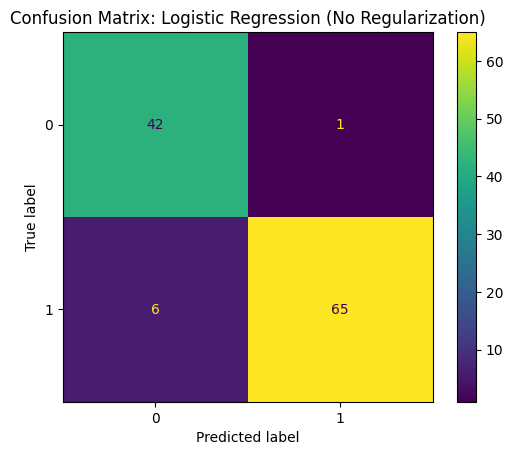

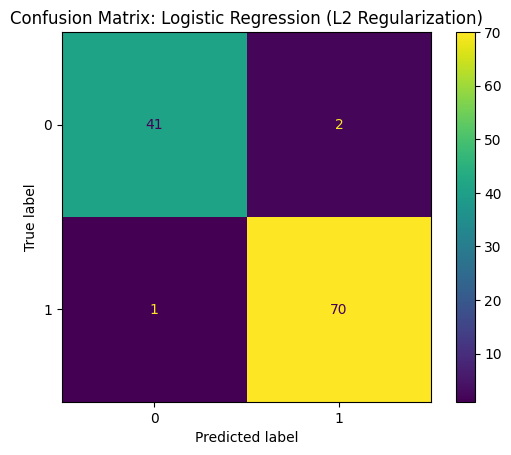

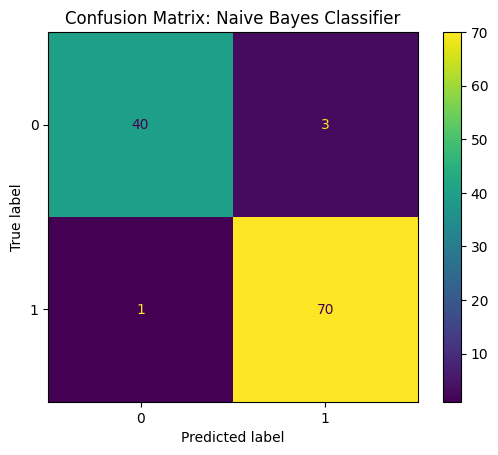

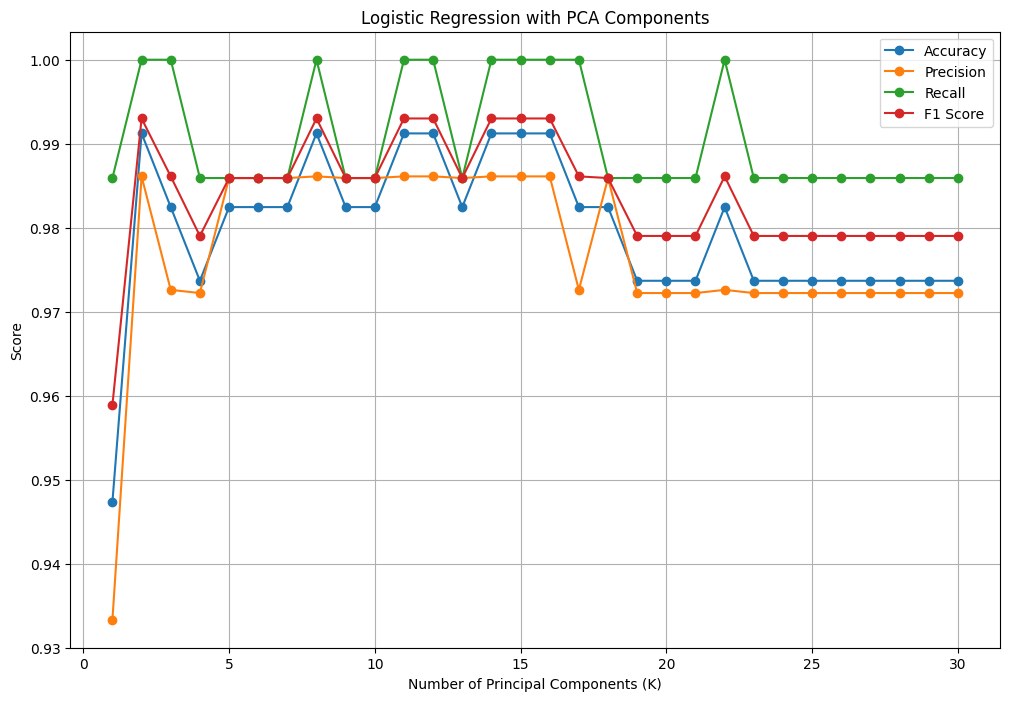

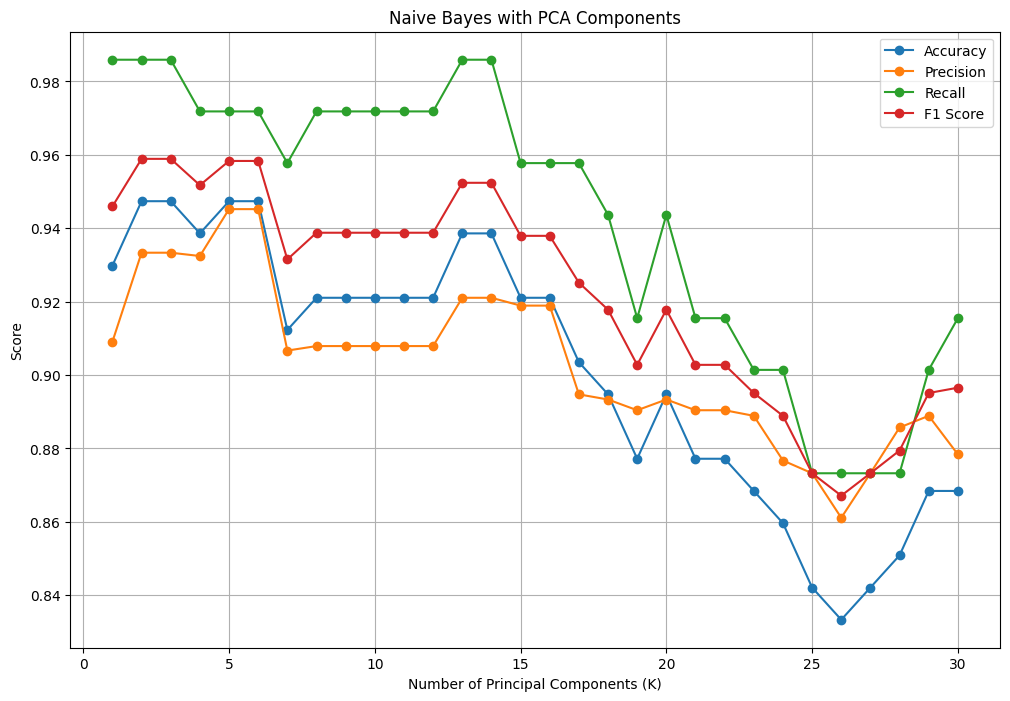

Optimal K for Logistic Regression with PCA: 2
Optimal K for Naive Bayes with PCA: 2


In [9]:
#summary of hw 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

#80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# conf matrix
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.title(title)
    plt.show()

#problem1
model_log_reg = LogisticRegression(max_iter=10000, penalty=None)
model_log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = model_log_reg.predict(X_test_scaled)

#metrics for problem 1
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

plot_confusion_matrix(y_test, y_pred_log_reg, "Confusion Matrix: Logistic Regression (No Regularization)")

#problem 2
model_log_reg_l2 = LogisticRegression(max_iter=10000, penalty='l2')
model_log_reg_l2.fit(X_train_scaled, y_train)
y_pred_log_reg_l2 = model_log_reg_l2.predict(X_test_scaled)

#problem 2 metrics
accuracy_log_reg_l2 = accuracy_score(y_test, y_pred_log_reg_l2)
precision_log_reg_l2 = precision_score(y_test, y_pred_log_reg_l2)
recall_log_reg_l2 = recall_score(y_test, y_pred_log_reg_l2)
f1_log_reg_l2 = f1_score(y_test, y_pred_log_reg_l2)

plot_confusion_matrix(y_test, y_pred_log_reg_l2, "Confusion Matrix: Logistic Regression (L2 Regularization)")

#problem 3
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

#problem 3 metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix: Naive Bayes Classifier")

#problem 4
accuracy_pca = []
precision_pca = []
recall_pca = []
f1_pca = []
num_components = []

K_max = X_train_scaled.shape[1]

for k in range(1, K_max + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model_pca = LogisticRegression(max_iter=10000)
    model_pca.fit(X_train_pca, y_train)

    y_pred_pca = model_pca.predict(X_test_pca)

    accuracy_pca.append(accuracy_score(y_test, y_pred_pca))
    precision_pca.append(precision_score(y_test, y_pred_pca))
    recall_pca.append(recall_score(y_test, y_pred_pca))
    f1_pca.append(f1_score(y_test, y_pred_pca))
    num_components.append(k)

#accuracy, precision, recall, F1 for different iterations
plt.figure(figsize=(12, 8))
plt.plot(num_components, accuracy_pca, label='Accuracy', marker='o')
plt.plot(num_components, precision_pca, label='Precision', marker='o')
plt.plot(num_components, recall_pca, label='Recall', marker='o')
plt.plot(num_components, f1_pca, label='F1 Score', marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Logistic Regression with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

#problem 5
accuracy_pca_nb = []
precision_pca_nb = []
recall_pca_nb = []
f1_pca_nb = []
num_components_nb = []

for k in range(1, K_max + 1):
    pca = PCA(n_components=k)
    X_train_pca_nb = pca.fit_transform(X_train_scaled)
    X_test_pca_nb = pca.transform(X_test_scaled)

    nb_model_pca = GaussianNB()
    nb_model_pca.fit(X_train_pca_nb, y_train)

    y_pred_pca_nb = nb_model_pca.predict(X_test_pca_nb)

    accuracy_pca_nb.append(accuracy_score(y_test, y_pred_pca_nb))
    precision_pca_nb.append(precision_score(y_test, y_pred_pca_nb))
    recall_pca_nb.append(recall_score(y_test, y_pred_pca_nb))
    f1_pca_nb.append(f1_score(y_test, y_pred_pca_nb))
    num_components_nb.append(k)

#accuracy, precision, recall, F1 for different iterations
plt.figure(figsize=(12, 8))
plt.plot(num_components_nb, accuracy_pca_nb, label='Accuracy', marker='o')
plt.plot(num_components_nb, precision_pca_nb, label='Precision', marker='o')
plt.plot(num_components_nb, recall_pca_nb, label='Recall', marker='o')
plt.plot(num_components_nb, f1_pca_nb, label='F1 Score', marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Naive Bayes with PCA Components')
plt.legend()
plt.grid(True)
plt.show()

#optimal K
optimal_k_log_reg = num_components[accuracy_pca.index(max(accuracy_pca))]
optimal_k_nb = num_components_nb[accuracy_pca_nb.index(max(accuracy_pca_nb))]
print(f"Optimal K for Logistic Regression with PCA: {optimal_k_log_reg}")
print(f"Optimal K for Naive Bayes with PCA: {optimal_k_nb}")
